In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv(r'../data/train_tokenized.csv')
df_test = pd.read_csv(r'../data/test_tokenized.csv')

df_train

,post,gender,tokenized,cleaned,cluster
0,What? No escape? I thought that I would be ab...,1,"['escape', 'thought', 'would', 'able', 'get', ...","['escape', 'thought', 'able', 'need', 'hear', ...",7
1,"And all I can say is Thank You, Thank You!!! ...",1,"['say', 'thank', 'thank', 'think', 'look', 'an...","['thank', 'thank', 'think', 'look', 'surgical'...",7
2,She is a very very sweet girl :)\n\nIts hardly...,1,"['sweet', 'girl', 'hardly', '2', 'month', 'sin...","['sweet', 'girl', 'hardly', 'month', 'start', ...",5
3,"I love what Brooke had to say about the event,...",1,"['love', 'brooke', 'say', 'event', 'also', 'ti...","['love', 'brooke', 'event', 'tidbit', 'advice'...",2
4,I have some photos I've been meaning to post f...,1,"['photo', 'ive', 'mean', 'post', 'david', 'rei...","['photo', 'mean', 'post', 'david', 'reid', 'lo...",2
...,...,...,...,...,...
2569,"So, on my long run of the week I like to conte...",1,"['long', 'run', 'week', 'like', 'contemplate',...","['long', 'run', 'week', 'like', 'contemplate',...",7
2570,Contact lenses require a certain degree of car...,0,"['contact', 'lenses', 'require', 'certain', 'd...","['contact', 'lense', 'require', 'certain', 'de...",2
2571,I didn't start watching AD until way after the...,1,"['didnt', 'start', 'watch', 'ad', 'way', 'show...","['start', 'watch', 'way', 'late', 'know', 'beg...",2
2572,"At Creation Moments, Ian Taylor starts by aski...",0,"['creation', 'moment', 'ian', 'taylor', 'start...","['creation', 'moment', 'ian', 'taylor', 'start...",7


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score

### Unigrams

In [3]:
pipe1 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1,1))), ('naive', MultinomialNB())])
pipe1.fit(X=df_train['tokenized'], y=df_train['gender'])

pred1 = pipe1.predict(df_test['tokenized'])
#print(classification_report(y_true=df_test['gender'], y_pred=pred1))
print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred1)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred1, average='weighted')))

Accuracy = 0.6832298136645962
F1 score = 0.6833214761250743


In [5]:
pipe3 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1,3))), ('naive', MultinomialNB())])
pipe3.fit(X=df_train['tokenized'], y=df_train['gender'])

pred3 = pipe3.predict(df_test['tokenized'])
#print(classification_report(y_true=df_test['gender'], y_pred=pred3))
print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred3)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred3, average='weighted')))

Accuracy = 0.6925465838509317
F1 score = 0.6917593733351294


Also trying 4-grams, 5-grams and 6-grams, but not really any improvement (gets worse if anything)

In [6]:
pipe4 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1,4))), ('naive', MultinomialNB())])
pipe4.fit(X=df_train['tokenized'], y=df_train['gender'])

pred4 = pipe4.predict(df_test['tokenized'])
#print(classification_report(y_true=df_test['gender'], y_pred=pred4))
print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred4)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred4, average='weighted')))

Accuracy = 0.6972049689440993
F1 score = 0.6959047120225544


In [7]:
pipe5 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1,5))), ('naive', MultinomialNB())])
pipe5.fit(X=df_train['tokenized'], y=df_train['gender'])

pred5 = pipe5.predict(df_test['tokenized'])
#print(classification_report(y_true=df_test['gender'], y_pred=pred5))
print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred5)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred5, average='weighted')))

Accuracy = 0.6956521739130435
F1 score = 0.6938496853268281


In [8]:
pipe6 = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1,6))), ('naive', MultinomialNB())])
pipe6.fit(X=df_train['tokenized'], y=df_train['gender'])

pred6 = pipe6.predict(df_test['tokenized'])
#print(classification_report(y_true=df_test['gender'], y_pred=pred6))
print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred6)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred6, average='weighted')))

Accuracy = 0.6925465838509317
F1 score = 0.6902360095681963


## Tune Naive Bayes

In [4]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('vectorizer', TfidfVectorizer()), ('naive', MultinomialNB())])

parameters = {'naive__alpha':[0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5] }
# by default 5-fold cross validation
search = GridSearchCV(pipe, parameters)

search.fit(df_train['tokenized'], df_train['gender'])

print("Best CV score = %0.3f with the following parameters:" % search.best_score_)
print(search.best_params_)

Best CV score = 0.716 with the following parameters:
{'naive__alpha': 0.5}


According to the cross-validation search, the optimal model has naive bayes parameter alpha=0.5

In [15]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

opt_pipe = Pipeline([('vectorizer', TfidfVectorizer()), ('naive', MultinomialNB(alpha=0.5))])
opt_pipe.fit(df_train['tokenized'], df_train['gender'])

pred = opt_pipe.predict(df_test['tokenized']) # or search.predict(df_test['tokenized'])

print(classification_report(df_test['gender'], pred))
print("Accuracy  = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred)))
print("Precision = " + str(precision_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("Recall    = " + str(recall_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("F1 score  = " + str(f1_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       335
           1       0.67      0.72      0.70       309

    accuracy                           0.70       644
   macro avg       0.70      0.70      0.70       644
weighted avg       0.70      0.70      0.70       644

Accuracy  = 0.7003105590062112
Precision = 0.7021986056984747
Recall    = 0.7003105590062112
F1 score  = 0.7003604196890907


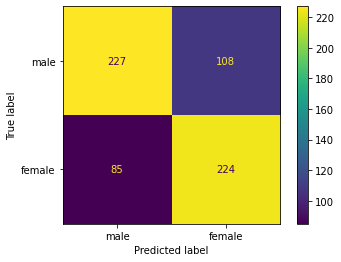

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(df_test['gender'], pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['male', 'female'])
disp.plot()
plt.grid(False)
plt.show()

### Save the optimal model to the drive

In [8]:
import pickle

model = '../models/NB_unigrams.sav'
pickle.dump(opt_pipe, open(model, 'wb'))

# load the model with pickle.load(open(filename, 'rb'))

### Using CountVectorizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

pipe = Pipeline([('vectorizer', CountVectorizer()), ('naive', MultinomialNB())])

parameters = {'naive__alpha':[0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5] }
# by default 5-fold cross validation
search = GridSearchCV(pipe, parameters)

search.fit(df_train['tokenized'], df_train['gender'])

print("Best CV score = %0.3f with the following parameters:" % search.best_score_)
print(search.best_params_)

Best CV score = 0.700 with the following parameters:
{'naive__alpha': 0.1}


In [12]:
opt_pipe = Pipeline([('vectorizer', CountVectorizer()), ('naive', MultinomialNB(alpha=0.1))])
opt_pipe.fit(df_train['tokenized'], df_train['gender'])

pred = opt_pipe.predict(df_test['tokenized']) # or search.predict(df_test['tokenized'])

print(classification_report(df_test['gender'], pred))
print("Accuracy  = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred)))
print("Precision = " + str(precision_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("Recall    = " + str(recall_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("F1 score  = " + str(f1_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65       335
           1       0.63      0.78      0.69       309

    accuracy                           0.67       644
   macro avg       0.68      0.68      0.67       644
weighted avg       0.68      0.67      0.67       644

Accuracy  = 0.672360248447205
Precision = 0.6846443087185646
Recall    = 0.672360248447205
F1 score  = 0.6696352583554591


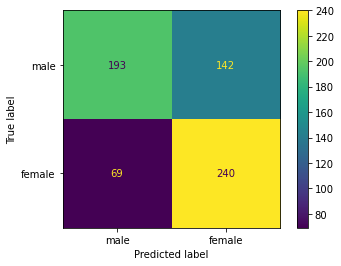

In [13]:
cm = confusion_matrix(df_test['gender'], pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['male', 'female'])
disp.plot()
plt.grid(False)
plt.show()